In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import notebook
import FinanceDataReader as fdr
import matplotlib.pyplot as plt


# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# Data

In [67]:
# div_2019 = pd.read_csv('2019.txt', sep = "\t",  engine='python', encoding = "cp949", header=1, index_col=0)[:-1]
# div_2020 = pd.read_csv('2020.txt', sep = "\t",  engine='python', encoding = "cp949", header=1, index_col=0)[:-1]
# div_2021 = pd.read_csv('2021.txt', sep = "\t",  engine='python', encoding = "cp949", header=1, index_col=0)[:-1]
# div_2022 = pd.read_csv('2022.txt', sep = "\t",  engine='python', encoding = "cp949", header=1, index_col=0)[:-1]
# div_2023 = pd.read_csv('2023.txt', sep = "\t",  engine='python', encoding = "cp949", header=1, index_col=0)[:-1]

### data load

In [68]:
year_list = [2019 ,2020 ,2021 ,2022 ,2023]

In [69]:
for year in year_list:
    globals()[f'div_{year}'] = \
    pd.read_csv(f'./data/{year}.txt', sep = "\t",  engine='python', encoding = "cp949", header=1, index_col=0)[:-1]

- Infomax 3181화면 종목별 배당현황에서 txt 추출 후 DataFrame으로 가져오기
- i년도딍 배당데이터는 i+1년도 3월에 지급 

In [70]:
# div_2019 = div_2019.sort_values('배당수익률 ▼', ascending=False).reset_index()
# div_2020 = div_2020.sort_values('배당수익률 ▼', ascending=False).reset_index()
# div_2021 = div_2021.sort_values('배당수익률 ▼', ascending=False).reset_index()
# div_2022 = div_2022.sort_values('배당수익률 ▼', ascending=False).reset_index()
# div_2023 = div_2023.sort_values('배당수익률 ▼', ascending=False).reset_index()

In [71]:
for year in year_list:
    globals()[f'div_{year}'] = \
    eval(f'div_{year}').sort_values('배당수익률 ▼', ascending=False).reset_index().rename(columns = {'배당수익률 ▼': '배당수익률'})

In [72]:
div_2023

,연번,종목명,1Q,2Q,3Q,4Q,합계,종가,배당수익률
0,23,케이카,190,190,NaN,NaN,380,"11,420",3.32
1,12,SK텔레콤,830,830,NaN,NaN,"1,660","50,400",3.29
2,15,신한지주,525,525,NaN,NaN,"1,050","38,000",2.76
3,14,하나금융지주,600,600,NaN,NaN,"1,200","43,500",2.75
4,4,한샘,NaN,"1,500",NaN,NaN,"1,500","56,700",2.64
...,...,...,...,...,...,...,...,...,...
195,196,카카오페이,NaN,NaN,NaN,NaN,NaN,"46,550",NaN
196,197,GKL,NaN,NaN,NaN,NaN,NaN,"17,040",NaN
197,198,에스디바이오센서,NaN,NaN,NaN,NaN,NaN,"12,490",NaN
198,199,CJ대한통운,NaN,NaN,NaN,NaN,NaN,"79,800",NaN


In [73]:
div_2020.종목명

0        메리츠금융지주
1         JB금융지주
2          쌍용C&E
3             효성
4           HD현대
         ...    
195        SK스퀘어
196         셀트리온
197           후성
198          한진칼
199    SK바이오사이언스
Name: 종목명, Length: 200, dtype: object

## Stock Code 추출
- 가격데이터 가져오기 위해 fdr package 활용

In [74]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72000,1,300,0.42,71700,72300,71400,17823512,1283667032959,429824343600000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,514000,1,6000,1.18,506000,521000,504000,515495,265186657000,120276000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,122400,1,200,0.16,122900,124400,121600,3579662,440233706194,89107489476000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,731000,3,0,0.00,732000,734000,727000,63153,46182047000,52028194000000,71174000,STK
4,005490,KR7005490008,POSCO홀딩스,KOSPI,,584000,1,31000,5.61,560000,597000,554000,1831875,1064306301874,49389598320000,84571230,STK


In [75]:
df_krx = df_krx[['Code', 'Name']]

In [76]:
df_krx.columns = ['Code', '종목명']
df_krx

,Code,종목명
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,005490,POSCO홀딩스
...,...,...
2749,288490,나라소프트
2750,245450,씨앤에스링크
2751,308700,테크엔
2752,322190,베른


In [77]:
eval('div_2019')

,연번,종목명,1Q,2Q,3Q,4Q,합계,종가,배당수익률
0,146,쌍용C&E,100,100,110,110,420,"5,670",7.40
1,53,두산,"1,300","1,300","1,300","1,300","5,200","70,300",7.39
2,10,효성,NaN,NaN,NaN,"5,000","5,000","79,100",6.32
3,83,우리금융지주,NaN,NaN,NaN,700,700,"11,600",6.03
4,113,DGB금융지주,NaN,NaN,NaN,410,410,"7,120",5.75
...,...,...,...,...,...,...,...,...,...
195,196,넷마블,NaN,NaN,NaN,NaN,NaN,"92,400",NaN
196,197,삼성바이오로직스,NaN,NaN,NaN,NaN,NaN,"433,000",NaN
197,198,명신산업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,199,삼성중공업,NaN,NaN,NaN,NaN,NaN,"7,270",NaN


In [78]:
# list_2019 = pd.concat([df_krx, div_2019.종목명], axis=1, ignore_index=True).dropna()
# list_2020 = pd.concat([df_krx, div_2020.종목명], axis=1, ignore_index=True).dropna()
# list_2021 = pd.concat([df_krx, div_2021.종목명], axis=1, ignore_index=True).dropna()
# list_2022 = pd.concat([df_krx, div_2022.종목명], axis=1, ignore_index=True).dropna()
# list_2023 = pd.concat([df_krx, div_2023.종목명], axis=1, ignore_index=True).dropna()

In [157]:
for year in year_list:
    globals()[f'div_{year}_code'] = \
    pd.merge(eval(f'div_{year}'), df_krx, how='inner', on='종목명')[['Code', '종목명', '배당수익률']].dropna()

In [158]:
div_2022_code

,Code,종목명,배당수익률
0,175330,JB금융지주,10.58
1,316140,우리금융지주,9.78
2,024110,기업은행,9.77
3,138930,BNK금융지주,9.61
4,139130,DGB금융지주,9.29
...,...,...,...
156,093370,후성,0.18
157,006400,삼성SDI,0.17
158,128940,한미약품,0.16
159,003670,포스코퓨처엠,0.16


In [159]:
div_2022_code

,Code,종목명,배당수익률
0,175330,JB금융지주,10.58
1,316140,우리금융지주,9.78
2,024110,기업은행,9.77
3,138930,BNK금융지주,9.61
4,139130,DGB금융지주,9.29
...,...,...,...
156,093370,후성,0.18
157,006400,삼성SDI,0.17
158,128940,한미약품,0.16
159,003670,포스코퓨처엠,0.16


ex) 2020

In [17]:
n = 2020
df = fdr.DataReader('005930', f'{n}',f'{n+1}')
df.Close

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2020-12-23    73900
2020-12-24    77800
2020-12-28    78700
2020-12-29    78300
2020-12-30    81000
Name: Close, Length: 248, dtype: int64

In [19]:
# tmp_dict = {}
# for cd in notebook.tqdm(div_2022_code.Code):
#     tmp_dict[cd] = fdr.DataReader(cd, f'{2020}',f'{2021}').Close

In [21]:
# price_2020 = pd.DataFrame(tmp_dict)
# price_2020

In [22]:
for year in year_list:
    print(f'[{year}]')
    tmp_dict = {}
    for cd in notebook.tqdm(eval(f'div_{year}_code').Code):
        tmp_dict[cd] = fdr.DataReader(cd, f'{year}',f'{year+1}').Close
    globals()[f'price_{year}'] = pd.DataFrame(tmp_dict)
    eval(f'price_{year}').to_csv(f'./data/price_{year}.csv')

[2019]


  0%|          | 0/200 [00:00<?, ?it/s]

[2020]


  0%|          | 0/200 [00:00<?, ?it/s]

[2021]


  0%|          | 0/200 [00:00<?, ?it/s]

[2022]


  0%|          | 0/200 [00:00<?, ?it/s]

[2023]


  0%|          | 0/200 [00:00<?, ?it/s]

# analysis

In [27]:
for year in year_list:
    globals()[f'price_{year}'] = \
    pd.read_csv(f'./data/price_{year}.csv', engine='python', encoding = "cp949", index_col=0)[:-1]

In [28]:
div_2019

,연번,종목명,1Q,2Q,3Q,4Q,합계,종가,배당수익률 ▼
0,146,쌍용C&E,100,100,110,110,420,"5,670",7.40
1,53,두산,"1,300","1,300","1,300","1,300","5,200","70,300",7.39
2,10,효성,NaN,NaN,NaN,"5,000","5,000","79,100",6.32
3,83,우리금융지주,NaN,NaN,NaN,700,700,"11,600",6.03
4,113,DGB금융지주,NaN,NaN,NaN,410,410,"7,120",5.75
...,...,...,...,...,...,...,...,...,...
195,196,넷마블,NaN,NaN,NaN,NaN,NaN,"92,400",NaN
196,197,삼성바이오로직스,NaN,NaN,NaN,NaN,NaN,"433,000",NaN
197,198,명신산업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,199,삼성중공업,NaN,NaN,NaN,NaN,NaN,"7,270",NaN


In [29]:
price_2019

,003410,000150,004800,316140,139130,086790,024110,267250,175330,300720,...,009420,012450,298050,402340,009540,251270,207940,009900,010140,302440
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,6693,82318,47950,NaN,8050,36150,13550,67500,5540,12000,...,34950,32950,102500,NaN,125500,106000,369623,NaN,6834,NaN
2019-01-03,6606,79561,48450,NaN,8140,35550,13650,68200,5580,11800,...,31900,33950,101500,NaN,131500,104000,372094,NaN,7079,NaN
2019-01-04,6463,78774,47300,NaN,8300,35050,13350,70200,5590,11700,...,34200,35050,99800,NaN,138500,108500,376541,NaN,7315,NaN
2019-01-07,6507,81137,47650,NaN,8200,34850,13300,72400,5600,11800,...,33700,34250,102500,NaN,139000,110500,383459,NaN,7287,NaN
2019-01-08,6661,81925,48600,NaN,8170,34750,13450,71900,5620,11850,...,33600,33850,101500,NaN,134000,109000,381482,NaN,7042,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,6222,70500,81600,12000.0,7390,38550,12300,71100,5700,9770,...,34100,35350,109500,NaN,125500,89200,391860,NaN,6731,NaN
2019-12-23,6266,71000,82600,12150.0,7420,38700,12450,71900,5700,9700,...,35000,35000,109000,NaN,126500,91900,417555,NaN,6768,NaN
2019-12-24,6299,71000,83800,12050.0,7390,38250,12400,71600,5700,9560,...,34050,34750,108500,NaN,125500,91700,412120,NaN,6711,NaN


In [86]:
div_2019_code.dropna()

,Code,종목명,배당수익률
0,003410,쌍용C&E,7.40
1,000150,두산,7.39
2,004800,효성,6.32
3,316140,우리금융지주,6.03
4,139130,DGB금융지주,5.75
...,...,...,...
149,093370,후성,0.18
150,128940,한미약품,0.16
151,003240,태광산업,0.14
152,020150,롯데에너지머티리얼즈,0.11


In [189]:
ret_2020 = price_2020.pct_change().cumsum()
ret_2020.tail()

,138040,175330,003410,004800,267250,005940,033780,139130,138930,030200,...,009830,192820,042670,028050,034220,402340,068270,093370,180640,302440
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-22,-0.004176,0.159289,0.198190,0.135998,0.054712,0.006874,-0.020527,0.117165,-0.185496,-0.023706,...,1.144699,0.278236,0.591748,-0.280910,0.161635,NaN,0.834355,0.448260,0.879100,NaN
2020-12-23,-0.004176,0.160981,0.189569,0.147304,0.038583,0.020090,-0.017090,0.104836,-0.183772,-0.025690,...,1.162235,0.264988,0.604335,-0.272973,0.225775,NaN,0.823215,0.462149,0.882433,NaN
2020-12-24,0.005439,0.152535,0.204062,0.158485,0.066452,0.046177,-0.007958,0.115932,-0.161397,-0.013762,...,1.146071,0.274283,0.596877,-0.241477,0.203857,NaN,0.802089,0.512377,0.887416,NaN
2020-12-28,0.005439,0.155942,0.201205,0.152342,0.082401,0.037703,-0.005695,0.106330,-0.142878,-0.011797,...,1.132938,0.281446,0.567114,-0.256744,0.215062,NaN,0.761801,0.521073,0.879152,NaN
2020-12-29,-0.046942,0.111800,0.168253,0.102898,-0.005511,-0.009306,-0.065515,0.056468,-0.205688,-0.062778,...,1.187306,0.284494,0.573492,-0.252868,0.245533,NaN,0.862563,0.534004,0.892485,NaN


In [ ]:
q10 = data_bind['return'].quantile(q=1, interpolation='nearest')

In [ ]:
np.array(div_2019_code.dropna().배당수익률)

array([7.4 , 7.39, 6.32, 6.03, 5.75, 5.69, 5.67, 5.47, 5.46, 5.03, 4.9 ,
       4.72, 4.69, 4.69, 4.66, 4.63, 4.4 , 4.26, 4.22, 4.2 , 4.14, 4.07,
       4.03, 4.02, 4.  , 3.93, 3.76, 3.75, 3.68, 3.65, 3.57, 3.55, 3.49,
       3.49, 3.44, 3.4 , 3.38, 3.31, 3.29, 3.26, 3.22, 3.04, 3.03, 2.99,
       2.99, 2.98, 2.89, 2.86, 2.86, 2.82, 2.81, 2.8 , 2.8 , 2.66, 2.59,
       2.58, 2.57, 2.53, 2.48, 2.44, 2.43, 2.41, 2.38, 2.35, 2.2 , 2.19,
       2.12, 2.12, 2.02, 2.  , 1.99, 1.96, 1.95, 1.94, 1.93, 1.92, 1.92,
       1.91, 1.91, 1.9 , 1.89, 1.84, 1.8 , 1.7 , 1.68, 1.66, 1.63, 1.59,
       1.57, 1.56, 1.56, 1.55, 1.54, 1.46, 1.43, 1.42, 1.41, 1.41, 1.39,
       1.38, 1.35, 1.34, 1.34, 1.31, 1.29, 1.29, 1.29, 1.26, 1.23, 1.21,
       1.2 , 1.17, 1.16, 1.12, 1.06, 1.06, 1.04, 1.  , 0.96, 0.92, 0.9 ,
       0.88, 0.88, 0.87, 0.86, 0.84, 0.81, 0.77, 0.76, 0.75, 0.7 , 0.7 ,
       0.69, 0.69, 0.63, 0.62, 0.6 , 0.56, 0.52, 0.5 , 0.5 , 0.43, 0.43,
       0.42, 0.38, 0.36, 0.21, 0.2 , 0.2 , 0.18, 0.

In [161]:
bins = pd.qcut(np.array(div_2019_code.배당수익률), 5)
bins.describe().counts

categories
(0.079, 0.876]    31
(0.876, 1.542]    31
(1.542, 2.404]    30
(2.404, 3.558]    31
(3.558, 7.4]      31
Name: counts, dtype: int64

In [148]:
for i in bins.describe().counts:
    print(i)

31
31
30
31
31


In [163]:
q10 = div_2019_code.dropna().배당수익률.quantile(q=1, interpolation='nearest')
q8 = div_2019_code.dropna().배당수익률.quantile(q=0.8, interpolation='nearest')
q6 = div_2019_code.dropna().배당수익률.quantile(q=0.6, interpolation='nearest')
q4 = div_2019_code.dropna().배당수익률.quantile(q=0.4, interpolation='nearest')
q2 = div_2019_code.dropna().배당수익률.quantile(q=0.2, interpolation='nearest')

In [199]:
q2, q4, q6, q8, q10 

(0.88, 1.54, 2.41, 3.55, 7.4)

In [165]:
div_2019_code

,Code,종목명,배당수익률
0,003410,쌍용C&E,7.40
1,000150,두산,7.39
2,004800,효성,6.32
3,316140,우리금융지주,6.03
4,139130,DGB금융지주,5.75
...,...,...,...
149,093370,후성,0.18
150,128940,한미약품,0.16
151,003240,태광산업,0.14
152,020150,롯데에너지머티리얼즈,0.11


In [170]:
q10_8 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q10].index[0]:div_2019_code[div_2019_code['배당수익률'] == q8].index[0],:]
q8_6 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q8].index[0]:div_2019_code[div_2019_code['배당수익률'] == q6].index[0],:]
q6_4 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q6].index[0]:div_2019_code[div_2019_code['배당수익률'] == q4].index[0],:]
q4_2 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q4].index[0]:div_2019_code[div_2019_code['배당수익률'] == q2].index[0],:]
q2_0 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q2].index[0]:,:]

In [201]:
q10_8_ticker_list = [i for i in q10_8['Code']]
q10_8_ret_sum = ret_2020[q10_8_ticker_list].sum(axis=1)

q8_6_ticker_list = [i for i in q8_6['Code']]
q8_6_ret_sum = ret_2020[q8_6_ticker_list].sum(axis=1)

q6_4_ticker_list = [i for i in q6_4['Code']]
q6_4_ret_sum = ret_2020[q6_4_ticker_list].sum(axis=1)

q4_2_ticker_list = [i for i in q4_2['Code']]
q4_2_ret_sum = ret_2020[q4_2_ticker_list].sum(axis=1)

q2_0_ticker_list = [i for i in q2_0['Code']]
q2_0_ret_sum = ret_2020[q2_0_ticker_list].sum(axis=1)

In [193]:
momentum_assorted = pd.DataFrame({'q10_8':q10_8_ret_sum, 'q8_6':q8_6_ret_sum, 
                             'q6_4':q6_4_ret_sum, 'q4_2':q4_2_ret_sum, 
                             'q2_0':q2_0_ret_sum})

momentum_assorted

,q10_8,q8_6,q6_4,q4_2,q2_0
Date,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.088767,-0.084618,-0.032350,0.025306,0.018192
2020-01-06,-0.428284,-0.552273,-0.588696,-0.478868,-0.370554
2020-01-07,-0.330155,-0.324716,-0.326232,-0.172788,0.355120
2020-01-08,-1.071434,-0.911785,-1.237294,-0.951829,-0.459671
...,...,...,...,...,...
2020-12-22,2.830908,4.910751,7.681923,9.416593,15.371207
2020-12-23,2.885698,5.121599,8.040540,10.008576,14.749096
2020-12-24,3.357866,5.624009,8.384260,10.227592,14.737113


In [ ]:
for i in [i for i in q8_6['Code']]:
    if i in ret_2020.columns:   
        q8_6_ticker_list.append(i)
        
[i for i in [j for j in q8_6['Code']] if i in ret_2020.columns]   



q10_8_ticker_list = [i for i in [j for j in q10_8['Code']] if i in ret_2020.columns]; q10_8_ret_sum = ret_2020[q10_8_ticker_list].sum(axis=1)
q8_6_ticker_list =[i for i in [j for j in q8_6['Code']] if i in ret_2020.columns]; q8_6_ret_sum = ret_2020[q8_6_ticker_list].sum(axis=1)
q6_4_ticker_list =[i for i in [j for j in q6_4['Code']] if i in ret_2020.columns]; q6_4_ret_sum = ret_2020[q6_4_ticker_list].sum(axis=1)
q4_2_ticker_list =[i for i in [j for j in q4_2['Code']] if i in ret_2020.columns]; q4_2_ret_sum = ret_2020[q4_2_ticker_list].sum(axis=1)
q2_0_ticker_list =[i for i in [j for j in q2_0['Code']] if i in ret_2020.columns]; q2_0_ret_sum = ret_2020[q2_0_ticker_list].sum(axis=1)

In [ ]:
q10 = div_2019_code.dropna().배당수익률.quantile(q=1, interpolation='nearest')
q8 = div_2019_code.dropna().배당수익률.quantile(q=0.8, interpolation='nearest')
q6 = div_2019_code.dropna().배당수익률.quantile(q=0.6, interpolation='nearest')
q4 = div_2019_code.dropna().배당수익률.quantile(q=0.4, interpolation='nearest')
q2 = div_2019_code.dropna().배당수익률.quantile(q=0.2, interpolation='nearest')

q10_8 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q10].index[0]:div_2019_code[div_2019_code['배당수익률'] == q8].index[0],:]
q8_6 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q8].index[0]:div_2019_code[div_2019_code['배당수익률'] == q6].index[0],:]
q6_4 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q6].index[0]:div_2019_code[div_2019_code['배당수익률'] == q4].index[0],:]                   
q4_2 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q4].index[0]:div_2019_code[div_2019_code['배당수익률'] == q2].index[0],:]
q2_0 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q2].index[0]:,:]

q10_8_ticker_list = [i for i in [j for j in q10_8['Code']] if i in ret_2020.columns]
q8_6_ticker_list =[i for i in [j for j in q8_6['Code']] if i in ret_2020.columns]
q6_4_ticker_list =[i for i in [j for j in q6_4['Code']] if i in ret_2020.columns]
q4_2_ticker_list =[i for i in [j for j in q4_2['Code']] if i in ret_2020.columns]
q2_0_ticker_list =[i for i in [j for j in q2_0['Code']] if i in ret_2020.columns]

q10_8_ret_sum = ret_2020[q10_8_ticker_list].sum(axis=1)
q8_6_ret_sum = ret_2020[q8_6_ticker_list].sum(axis=1)
q6_4_ret_sum = ret_2020[q6_4_ticker_list].sum(axis=1)
q4_2_ret_sum = ret_2020[q4_2_ticker_list].sum(axis=1)
q2_0_ret_sum = ret_2020[q2_0_ticker_list].sum(axis=1)

div_factor = pd.DataFrame({'q10_8':q10_8_ret_sum, 'q8_6':q8_6_ret_sum, 
                             'q6_4':q6_4_ret_sum, 'q4_2':q4_2_ret_sum, 
                             'q2_0':q2_0_ret_sum})

div_factor

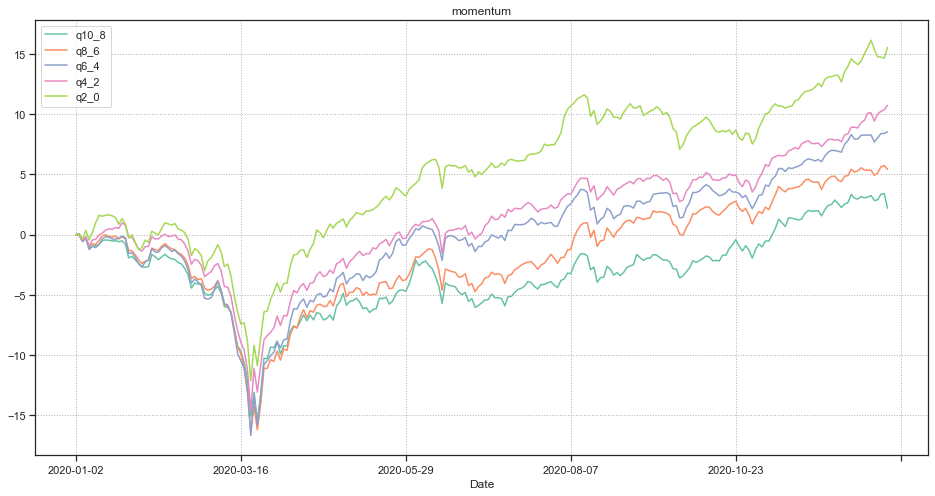

In [194]:
momentum_assorted.plot(legend=True, figsize=(16,8), title ='momentum');
plt.grid(True, color = '0.7', linestyle =':', linewidth=1)
plt.show();

-inf

,q10_8,q8_6,q6_4,q4_2,q2_0
Date,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.207348,0.008905,-0.007569,-0.359405,-0.449436
2019-01-04,-0.000657,0.457036,0.308224,-0.034811,-0.151236
2019-01-07,0.367893,0.596305,0.718944,0.224306,0.477996
2019-01-08,0.332667,0.390798,0.399146,0.394283,0.255794
...,...,...,...,...,...
2019-12-20,2.308466,-0.421941,-0.394296,1.309381,2.836476
2019-12-23,2.431866,-0.485376,-0.446337,1.299489,3.113294
2019-12-24,2.392486,-0.530541,-0.412498,1.185178,2.935725


In [132]:
np.random.seed(12)
normal = np.random.normal(size=10000)
bins = pd.cut(normal, 5)
bins.describe()

,counts,freqs
categories,,
"(-4.019, -2.447]",66,0.0066
"(-2.447, -0.883]",1854,0.1854
"(-0.883, 0.681]",5619,0.5619
"(0.681, 2.245]",2347,0.2347
"(2.245, 3.809]",114,0.0114


In [133]:
bins = pd.qcut(normal, 5)
bins.describe()

,counts,freqs
categories,,
"(-4.0120000000000005, -0.858]",2000,0.2
"(-0.858, -0.271]",2000,0.2
"(-0.271, 0.237]",2000,0.2
"(0.237, 0.837]",2000,0.2
"(0.837, 3.809]",2000,0.2


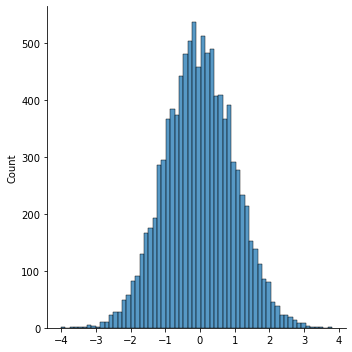

In [124]:
sns.displot(normal)

count     154
unique      5
top        q1
freq       62
Name: 배당수익률, dtype: object

In [111]:
cut

0      q5
1      q5
2      q5
3      q5
4      q4
       ..
149    q1
150    q1
151    q1
152    q1
153    q1
Name: 배당수익률, Length: 154, dtype: category
Categories (5, object): ['q1' < 'q2' < 'q3' < 'q4' < 'q5']

In [ ]:
q10_8 = div_2019_code.iloc[div_2019_code[momentum_sorted['return'] == q10].index[0]:momentum_sorted[momentum_sorted['return'] == q8].index[0],:]
q8_6 = div_2019_code.iloc[div_2019_code[momentum_sorted['return'] == q8].index[0]:momentum_sorted[momentum_sorted['return'] == q6].index[0],:]
q6_4 = div_2019_code.iloc[div_2019_code[momentum_sorted['return'] == q6].index[0]:momentum_sorted[momentum_sorted['return'] == q4].index[0],:]
q4_2 = div_2019_code.iloc[div_2019_code[momentum_sorted['return'] == q4].index[0]:momentum_sorted[momentum_sorted['return'] == q2].index[0],:]
q2_0 = div_2019_code.iloc[div_2019_code[momentum_sorted['return'] == q2].index[0]:,:]

In [53]:
a = np.array([1,2,3,4,5,6,7,8]) ## 데이터
cut = pd.cut(a, bins=3) ## 데이터를 최소 최대 구간으로 3등분한다.
cut

[(0.993, 3.333], (0.993, 3.333], (0.993, 3.333], (3.333, 5.667], (3.333, 5.667], (5.667, 8.0], (5.667, 8.0], (5.667, 8.0]]
Categories (3, interval[float64, right]): [(0.993, 3.333] < (3.333, 5.667] < (5.667, 8.0]]

C:\Users\jjgus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='배당수익률'>

C:\Users\jjgus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jjgus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jjgus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jjgus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jjgus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


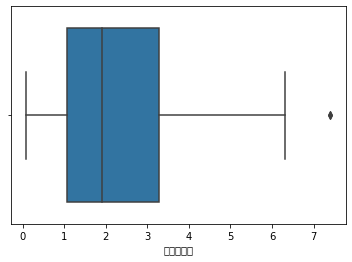

In [85]:
sns.boxplot(div_2019_code['배당수익률'])